In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ejemplos de la carpeta: Cutting Weevil


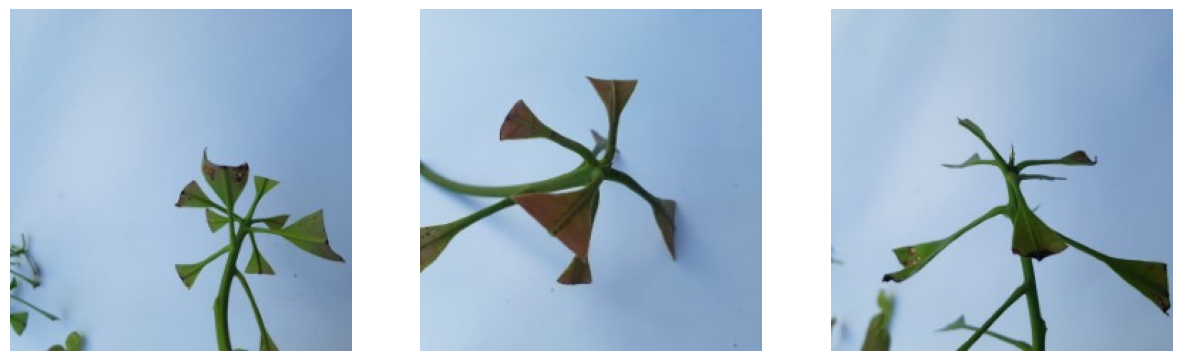

Ejemplos de la carpeta: Anthracnose


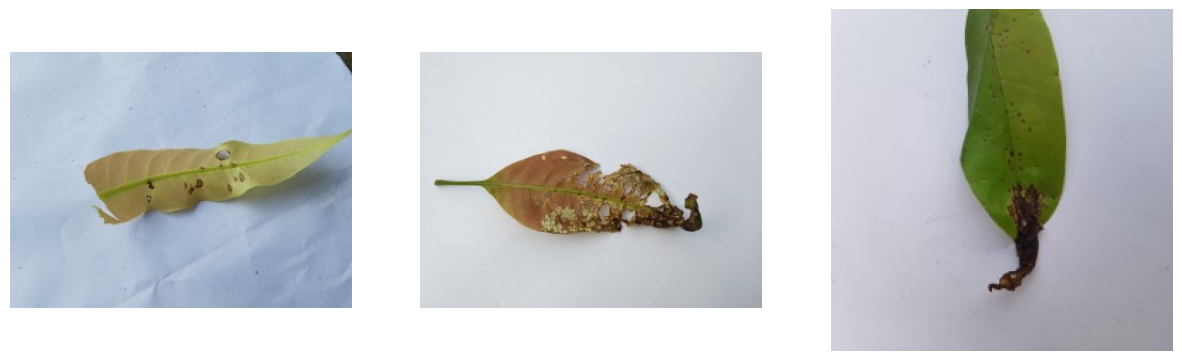

Ejemplos de la carpeta: Bacterial Canker


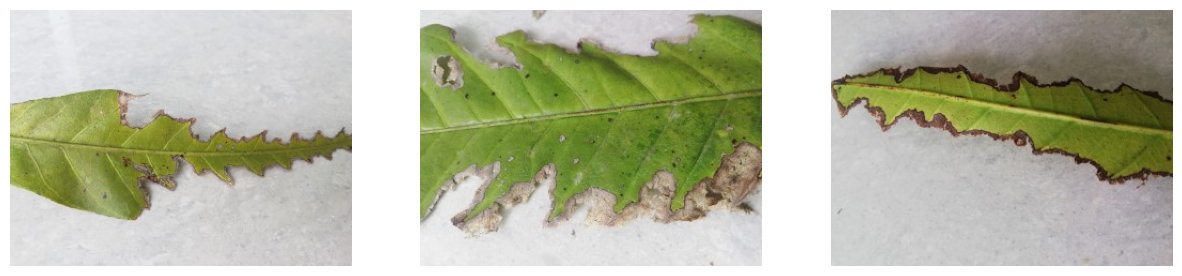

Ejemplos de la carpeta: Die Back


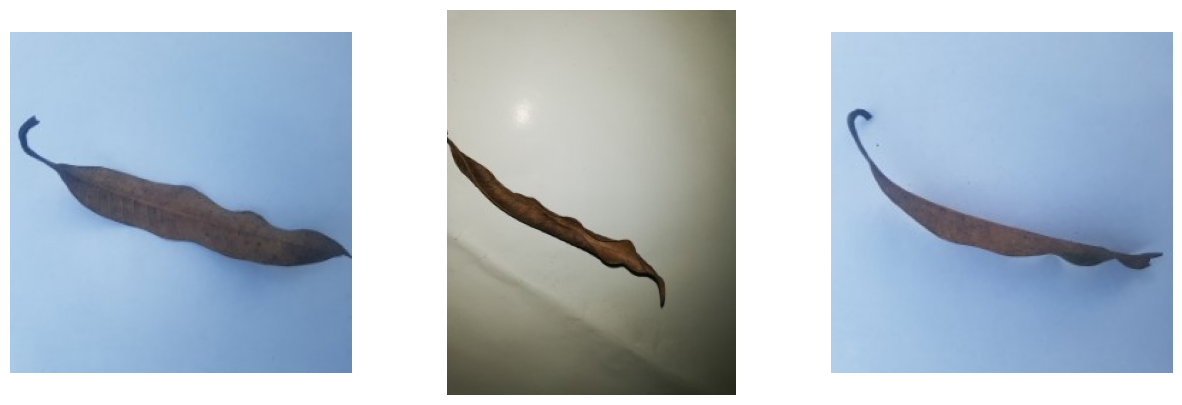

Ejemplos de la carpeta: Gall Midge


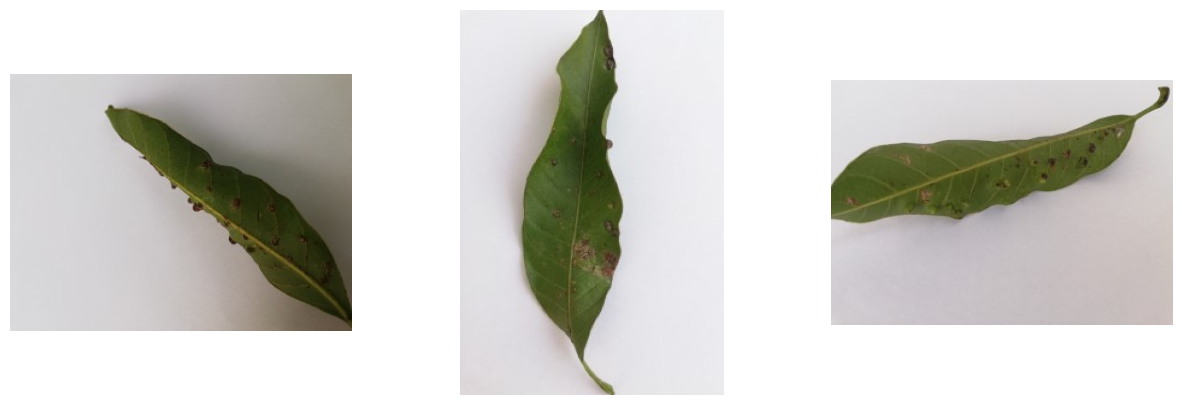

Ejemplos de la carpeta: Healthy


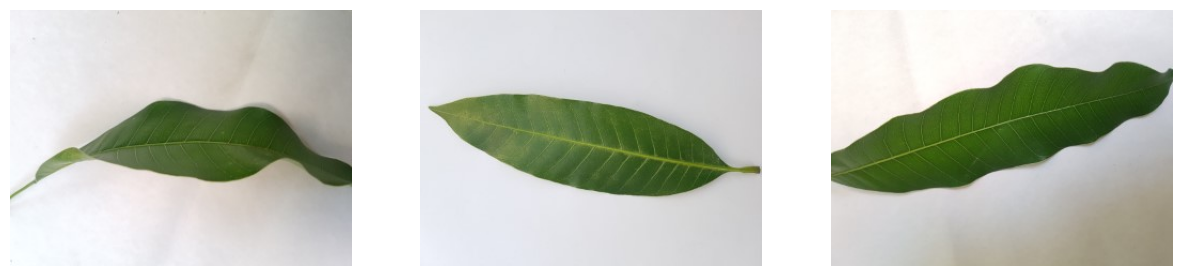

Ejemplos de la carpeta: Powdery Mildew


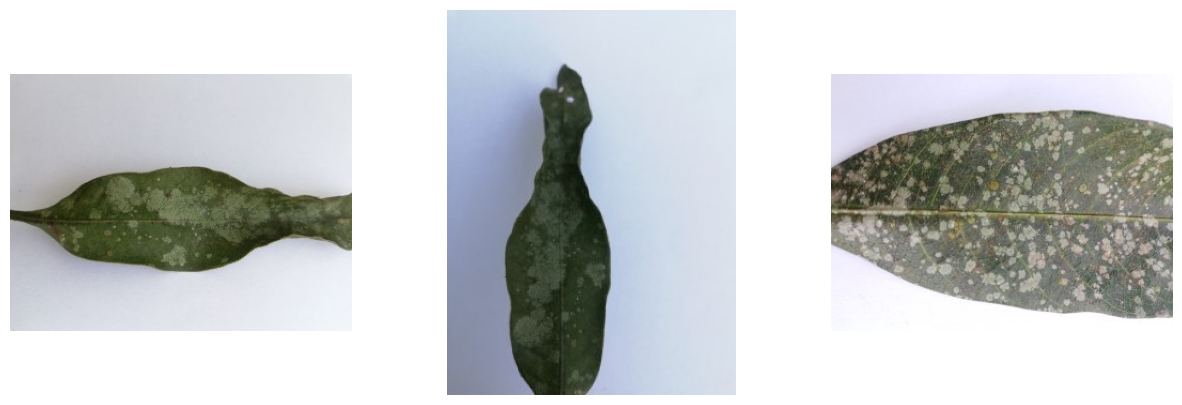

Ejemplos de la carpeta: Sooty Mould


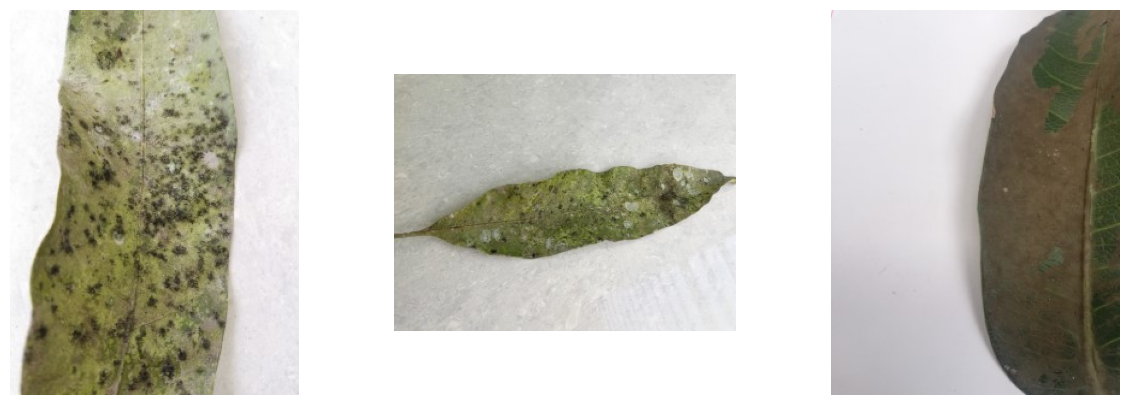

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta de la carpeta principal
folder_path = "/content/drive/MyDrive/Visión por computador/mango_leaf_disease"

# Obtener la lista de subcarpetas
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Iterar sobre las subcarpetas
for subfolder in subfolders:
    print(f"Ejemplos de la carpeta: {os.path.basename(subfolder)}")
    # Obtener la lista de archivos de imagen en la subcarpeta
    image_files = [os.path.join(subfolder, f) for f in os.listdir(subfolder) if f.endswith(('.jpg', '.jpeg', '.png'))]
    # Seleccionar tres imágenes aleatorias
    sample_images = random.sample(image_files, 3)
    # Mostrar las imágenes
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, image_path in enumerate(sample_images):
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()


In [3]:
import os
from PIL import Image
import numpy as np

# Especificamos la ruta de la carpeta principal que contiene las imágenes
folder_path = "/content/drive/MyDrive/Visión por computador/mango_leaf_disease"

# Obtenemos una lista de subcarpetas dentro de la carpeta principal
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Iteramos sobre cada subcarpeta encontrada
for subfolder in subfolders:
    print(f"Normalizando imágenes en la carpeta: {os.path.basename(subfolder)}")

    # Definimos la ruta para una nueva subcarpeta llamada "normalizadas"
    normalized_folder = os.path.join(subfolder, "normalizadas")

    # Si la carpeta "normalizadas" no existe, la creamos
    if not os.path.exists(normalized_folder):
        os.makedirs(normalized_folder)

    # Obtenemos la lista de archivos de imagen en la subcarpeta actual
    image_files = [os.path.join(subfolder, f) for f in os.listdir(subfolder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Procesamos cada archivo de imagen uno por uno
    for image_file in image_files:
        # Abrimos la imagen y la convertimos a escala de grises
        img = Image.open(image_file).convert('L')

        # Convertimos la imagen a un array de numpy y normalizamos los valores entre 0 y 1
        img_array = np.array(img) / 255.0

        # Reconstruimos la imagen a partir del array normalizado, escalándola de vuelta a valores entre 0 y 255
        img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))

        # Definimos la ruta donde guardaremos la imagen normalizada
        image_name = os.path.basename(image_file)
        normalized_image_path = os.path.join(normalized_folder, image_name)

        # Guardamos la imagen normalizada en la nueva carpeta
        img_normalized.save(normalized_image_path)



Normalizando imágenes en la carpeta: Cutting Weevil
Normalizando imágenes en la carpeta: Anthracnose
Normalizando imágenes en la carpeta: Bacterial Canker
Normalizando imágenes en la carpeta: Die Back
Normalizando imágenes en la carpeta: Gall Midge
Normalizando imágenes en la carpeta: Healthy
Normalizando imágenes en la carpeta: Powdery Mildew
Normalizando imágenes en la carpeta: Sooty Mould


In [5]:
import os
import numpy as np
from skimage.feature import hog
from skimage import exposure
from PIL import Image

# Especificamos la ruta de la carpeta principal que contiene las imágenes
folder_path = "/content/drive/MyDrive/Visión por computador/mango_leaf_disease"

# Obtenemos una lista de todas las subcarpetas dentro de la carpeta principal
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Configuramos los parámetros para el cálculo del Histograma de Gradientes Orientados (HOG)
orientations = 9  # Número de orientaciones de gradiente
pixels_per_cell = (8, 8)  # Tamaño de cada celda (en píxeles)
cells_per_block = (2, 2)  # Número de celdas en cada bloque

# Recorremos cada subcarpeta encontrada
for subfolder in subfolders:
    print(f"Calculando HOG para la carpeta: {os.path.basename(subfolder)}")

    # Definimos la ruta hacia la carpeta "normalizadas" dentro de la subcarpeta actual
    normalized_folder = os.path.join(subfolder, "normalizadas")

    # Obtenemos una lista de archivos de imagen normalizada en la subcarpeta "normalizadas"
    image_files = [os.path.join(normalized_folder, f) for f in os.listdir(normalized_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Procesamos cada archivo de imagen encontrado
    for image_file in image_files:
        # Abrimos la imagen normalizada
        img = Image.open(image_file)

        # Convertimos la imagen a escala de grises
        img_gray = img.convert('L')

        # Calculamos el Histograma de Gradientes Orientados (HOG)
        fd, hog_image = hog(img_gray, orientations=orientations, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, visualize=True, block_norm='L2-Hys')

        # Reescalamos la intensidad del HOG para mejorar su visualización
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # Guardamos la imagen del HOG resultante
        hog_image_path = os.path.splitext(image_file)[0] + "_hog.jpg"
        Image.fromarray((hog_image_rescaled * 255).astype(np.uint8)).save(hog_image_path)



Calculando HOG para la carpeta: Cutting Weevil
Calculando HOG para la carpeta: Anthracnose
Calculando HOG para la carpeta: Bacterial Canker
Calculando HOG para la carpeta: Die Back
Calculando HOG para la carpeta: Gall Midge
Calculando HOG para la carpeta: Healthy
Calculando HOG para la carpeta: Powdery Mildew
Calculando HOG para la carpeta: Sooty Mould


In [6]:
# Listar los archivos generados
for subfolder in subfolders:
    normalized_folder = os.path.join(subfolder, "normalizadas")
    hog_files = [f for f in os.listdir(normalized_folder) if f.endswith('_hog.jpg')]
    print(f"Archivos HOG en {normalized_folder}: {hog_files}")


Archivos HOG en /content/drive/MyDrive/Visión por computador/mango_leaf_disease/Cutting Weevil/normalizadas: ['20211011_161657(0) (Custom)_hog.jpg', '20211011_161859(0) (Custom)_hog.jpg', '20211011_161146 (Custom)_hog.jpg', '20211011_160933 (Custom)_hog.jpg', '20211011_162329 (Custom) (Custom)_hog.jpg', '20211011_162431 (Custom) (Custom)_hog.jpg', '20211011_161657(0) (Custom) (Custom)_hog.jpg', '20211011_140220 (Custom)_hog.jpg', '20211011_162530(0) (Custom)_hog.jpg', '20211011_161500 (Custom)_hog.jpg', '20211011_161909 (Custom)_hog.jpg', '20211011_162121 (Custom) (Custom)_hog.jpg', '20211011_161715(0) (Custom)_hog.jpg', '20211011_161206 (Custom)_hog.jpg', '20211011_161643 (Custom)_hog.jpg', '20211011_162013 (Custom)_hog.jpg', '20211011_161505 (Custom) (Custom)_hog.jpg', '20211011_162115 (Custom) (Custom)_hog.jpg', '20211011_161425 (Custom)_hog.jpg', '20211011_162503(0) (Custom)_hog.jpg', '20211011_162419 (Custom) (Custom)_hog.jpg', '20211011_161424(0) (Custom)_hog.jpg', '20211011_161

In [9]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler

# Ruta de la carpeta principal
folder_path = "/content/drive/MyDrive/Visión por computador/mango_leaf_disease"

# Obtener la lista de subcarpetas
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Listas para almacenar las características y las etiquetas
features = []
labels = []

# Iterar sobre las subcarpetas
for subfolder in subfolders:
    # Ruta de la carpeta "normalizadas"
    normalized_folder = os.path.join(subfolder, "normalizadas")
    # Obtener la lista de archivos HOG
    hog_files = [f for f in os.listdir(normalized_folder) if f.endswith('_hog.jpg')]
    # Iterar sobre los archivos HOG
    for hog_file in hog_files:
        # Leer la imagen HOG
        img_path = os.path.join(normalized_folder, hog_file)
        img = io.imread(img_path)
        # Asegurarse de que la imagen tenga las dimensiones correctas
        img_resized = resize(img, (128, 64))  # Tamaño típico de las características HOG
        # Aplanar la imagen
        img_flat = img_resized.flatten()
        # Agregar la imagen a la lista de características
        features.append(img_flat)
        # Agregar la etiqueta (nombre de la enfermedad) a la lista de etiquetas
        labels.append(os.path.basename(subfolder))

# Convertir listas a arrays numpy
X = np.array(features)
y = np.array(labels)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)


Precisión del modelo de regresión logística: 0.68125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
import joblib

# Guardar el modelo
joblib.dump(model, '/content/drive/MyDrive/Visión por computador/logistic_regression_model.pkl')



['/content/drive/MyDrive/Visión por computador/logistic_regression_model.pkl']

In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

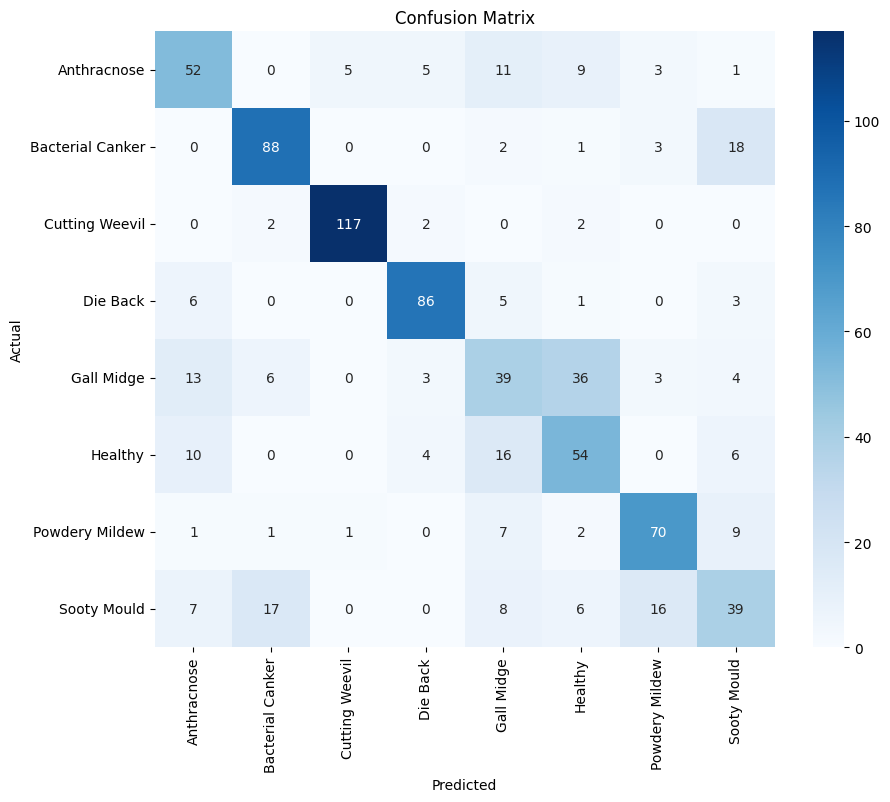

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

# Matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()